## Car Price Prediction with Machine Learning

Car price prediction is one of the major search areas in machine learning, the dataset which I am using consists various features that contribiutes to the price of a car. Now we will first perform data cleaning, data reduction, data visualization techniques on our data and then train and create a Machine Learning model.

Link to the dataset

https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv

Now as we can see our dataset is in https form right now, so we can convert into a proper csv file using requests module as follows:-

In [1]:
import requests

def download_csv_from_https(url, save_path):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            with open (save_path, "wb") as f:
                f.write(response.content)
            print("CSV file download successfully")
        else:
            print(f"CSV file failed to download :-, {response.status_code}")
    except requests.exceptions.RequestException as e:
        print(f"Error occured while downloading the CSV file :- {e}")

url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv"
save_path = "CarPrice.csv"


download_csv_from_https(url, save_path)

CSV file download successfully


In [2]:
# important libraries which we will use in this project:-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# First we will load our dataset for that we will use read_csv

df= pd.read_csv("CarPrice.csv")
# This displays all the cokumns same for rows also if we specify rows
pd.set_option('display.max_columns', None)  

In [4]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


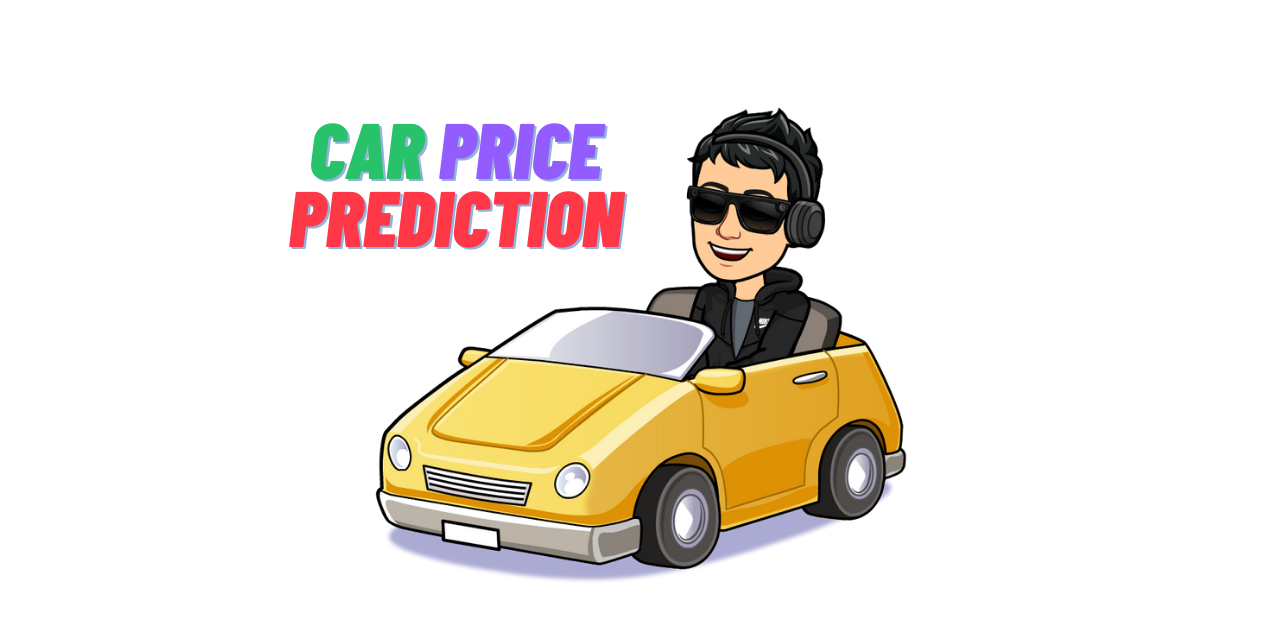

In [5]:
from IPython import display
display.Image("C:\\Users\\Malvika\\Downloads\\Carprice.png")

In [6]:
# head() will display the first 5 rows of the dataset
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
# tail() will display the first 5 rows of the dataset
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [8]:
# To check the shape of our dataset

df.shape  # it has 205 rows and 26 columns

(205, 26)

In [9]:
# To check the size of our dataset

df.size  # the total size

5330

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
df.describe()  # describe() provides statistical measures such as count, mean, standard deviation, minimum, quartiles, and maximum values for each numeric column in the DataFrame.

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## We can interpret our data as per above statistical measures as follows:-

- We have data with high std(standard deviation)
- The range of car length is from 141.100000 to 208.100000
- The range of car width is from 60.300000 to 72.300000
- The range of car height is from 47.800000 to 59.800000
- The range of price is from 5118.000000 to 45400.000000

## Exploratory Data Analysis

In [12]:
df.isnull()  # this will check the null values in the dataset as here our data showing "False" that means it has no null values 

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

we can interpret with the above analysis the we have 0 null values in our dataset

In [14]:
# To check for duplicate values

duplicate_count = df.duplicated().sum()
print(duplicate_count) 

0


In [15]:
# To view the column names in the dataset we will use 

df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [16]:
type(df) 

pandas.core.frame.DataFrame

In [17]:
# CarName unique columns of the dataset

df["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [18]:
data=df["CarName"].value_counts()
data

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [19]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [20]:
# Now if we see our dataset again we can analyize that we have two columns with same id so we can drop one of that column

df.drop(["car_ID"], axis=1, inplace=True)  #Inplace=True will make the changes in original dataset

In [21]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [22]:
# Price unique columns of the dataset

df["price"].unique()

array([13495.   , 16500.   , 13950.   , 17450.   , 15250.   , 17710.   ,
       18920.   , 23875.   , 17859.167, 16430.   , 16925.   , 20970.   ,
       21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,  5151.   ,
        6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,  6229.   ,
        6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,  6479.   ,
        6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,  7895.   ,
        9095.   ,  8845.   , 10295.   , 12945.   , 10345.   ,  6785.   ,
        8916.5  , 11048.   , 32250.   , 35550.   , 36000.   ,  5195.   ,
        6095.   ,  6795.   ,  6695.   ,  7395.   , 10945.   , 11845.   ,
       13645.   , 15645.   ,  8495.   , 10595.   , 10245.   , 10795.   ,
       11245.   , 18280.   , 18344.   , 25552.   , 28248.   , 28176.   ,
       31600.   , 34184.   , 35056.   , 40960.   , 45400.   , 16503.   ,
        5389.   ,  6189.   ,  6669.   ,  7689.   ,  9959.   ,  8499.   ,
       12629.   , 14869.   , 14489.   ,  6989.   , 

Now we can see our dataset has categorical features also as well as numerical featues so we can divide them two as follows:-

In [23]:
# Categorical_feature

Categorical_feature = [feature for feature in df.columns if df[feature].dtypes == "object"]

In [24]:
print("Categorical features are :- ", Categorical_feature)

Categorical features are :-  ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [25]:
# Numerical_feature

Numerical_feature = [feature for feature in df.columns if df[feature].dtypes != "object"]

In [26]:
print("Numerical features are :- ", Numerical_feature)

Numerical features are :-  ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


Here, the Categorical_feature list contains all the columns which contains object type values.

And the Numerical_feature list contains all the columns which have numeric (int, float) values

## Data Visualization

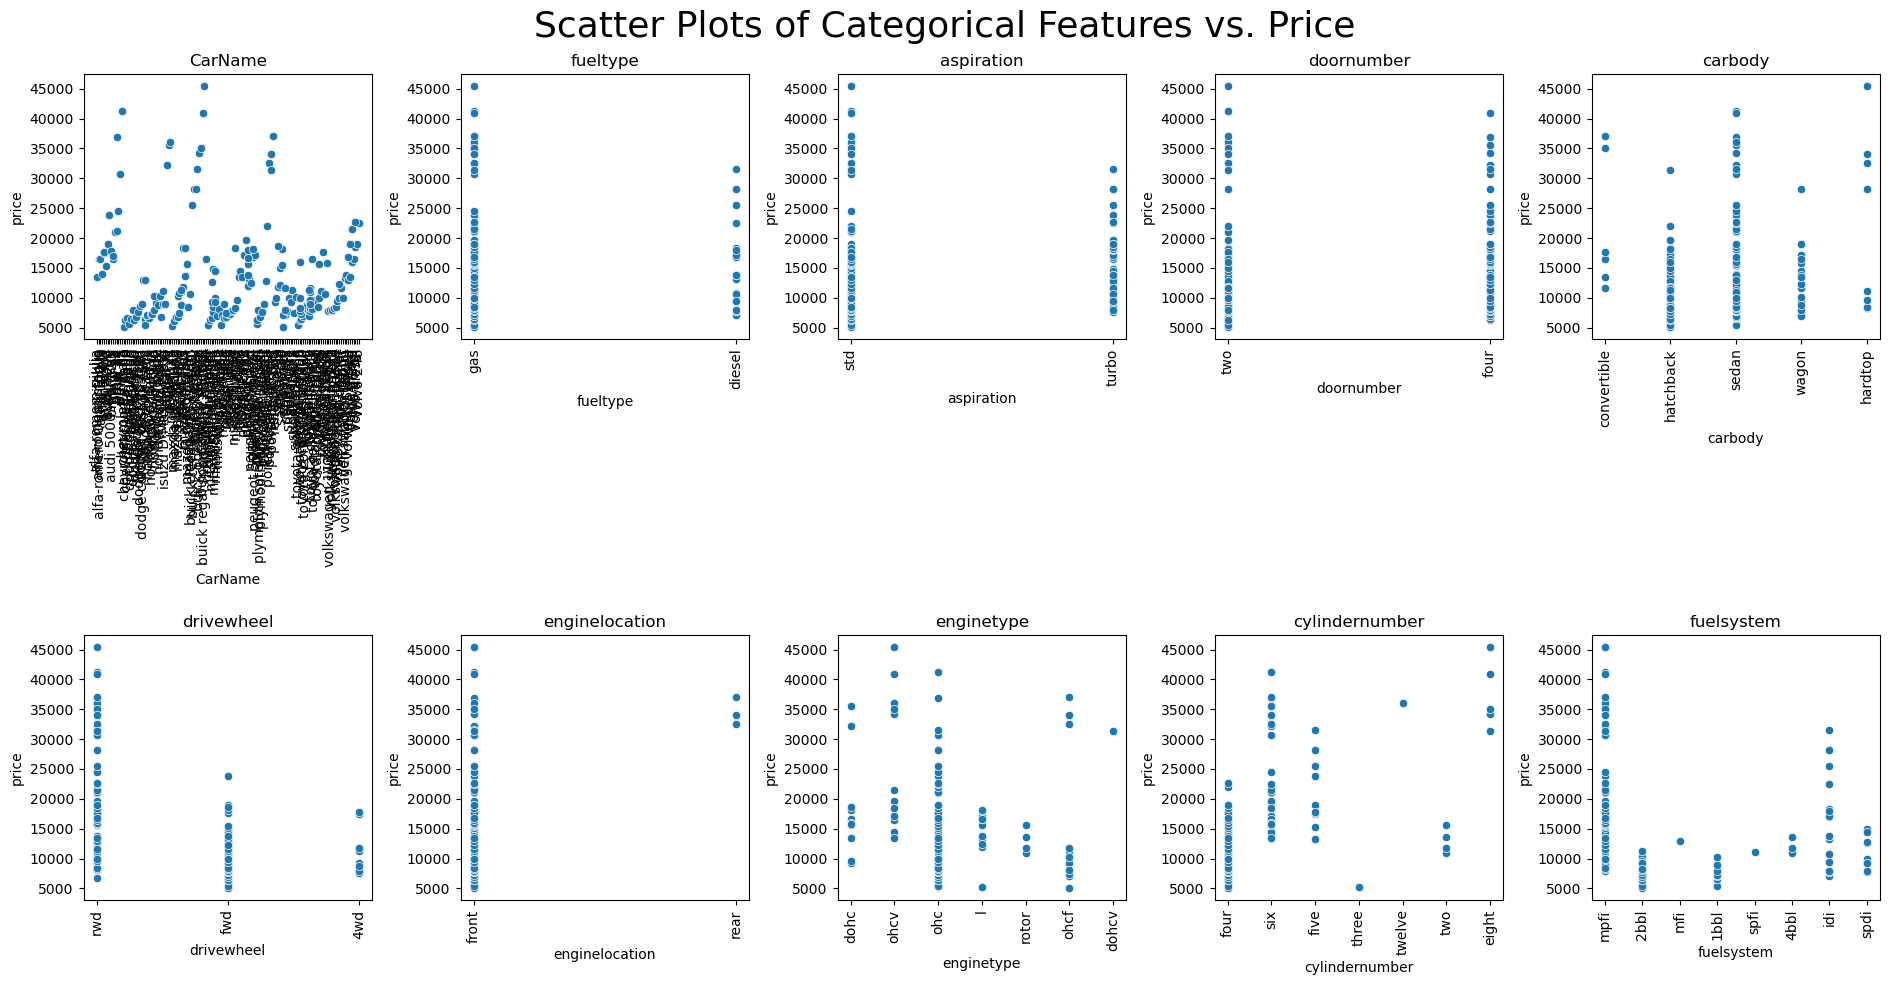

In [27]:
# Create a figure and axis objects for subplots for Categorical features
fig, axs = plt.subplots(2, 5, figsize=(19, 10), sharex=False, sharey=False)

axs = axs.flatten()

# Iterate over the features and create scatter subplots
for i, feature in enumerate(Categorical_feature):
    sns.scatterplot(data=df, x=feature, y='price', ax=axs[i])
    axs[i].set_title(feature)

    # Rotate x-axis tick labels to vertical
    axs[i].tick_params(axis='x', rotation=90)

# Add a common title for the entire figure
fig.suptitle('Scatter Plots of Categorical Features vs. Price', fontsize=26)

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout(h_pad=2)

# Display the plot
plt.show()


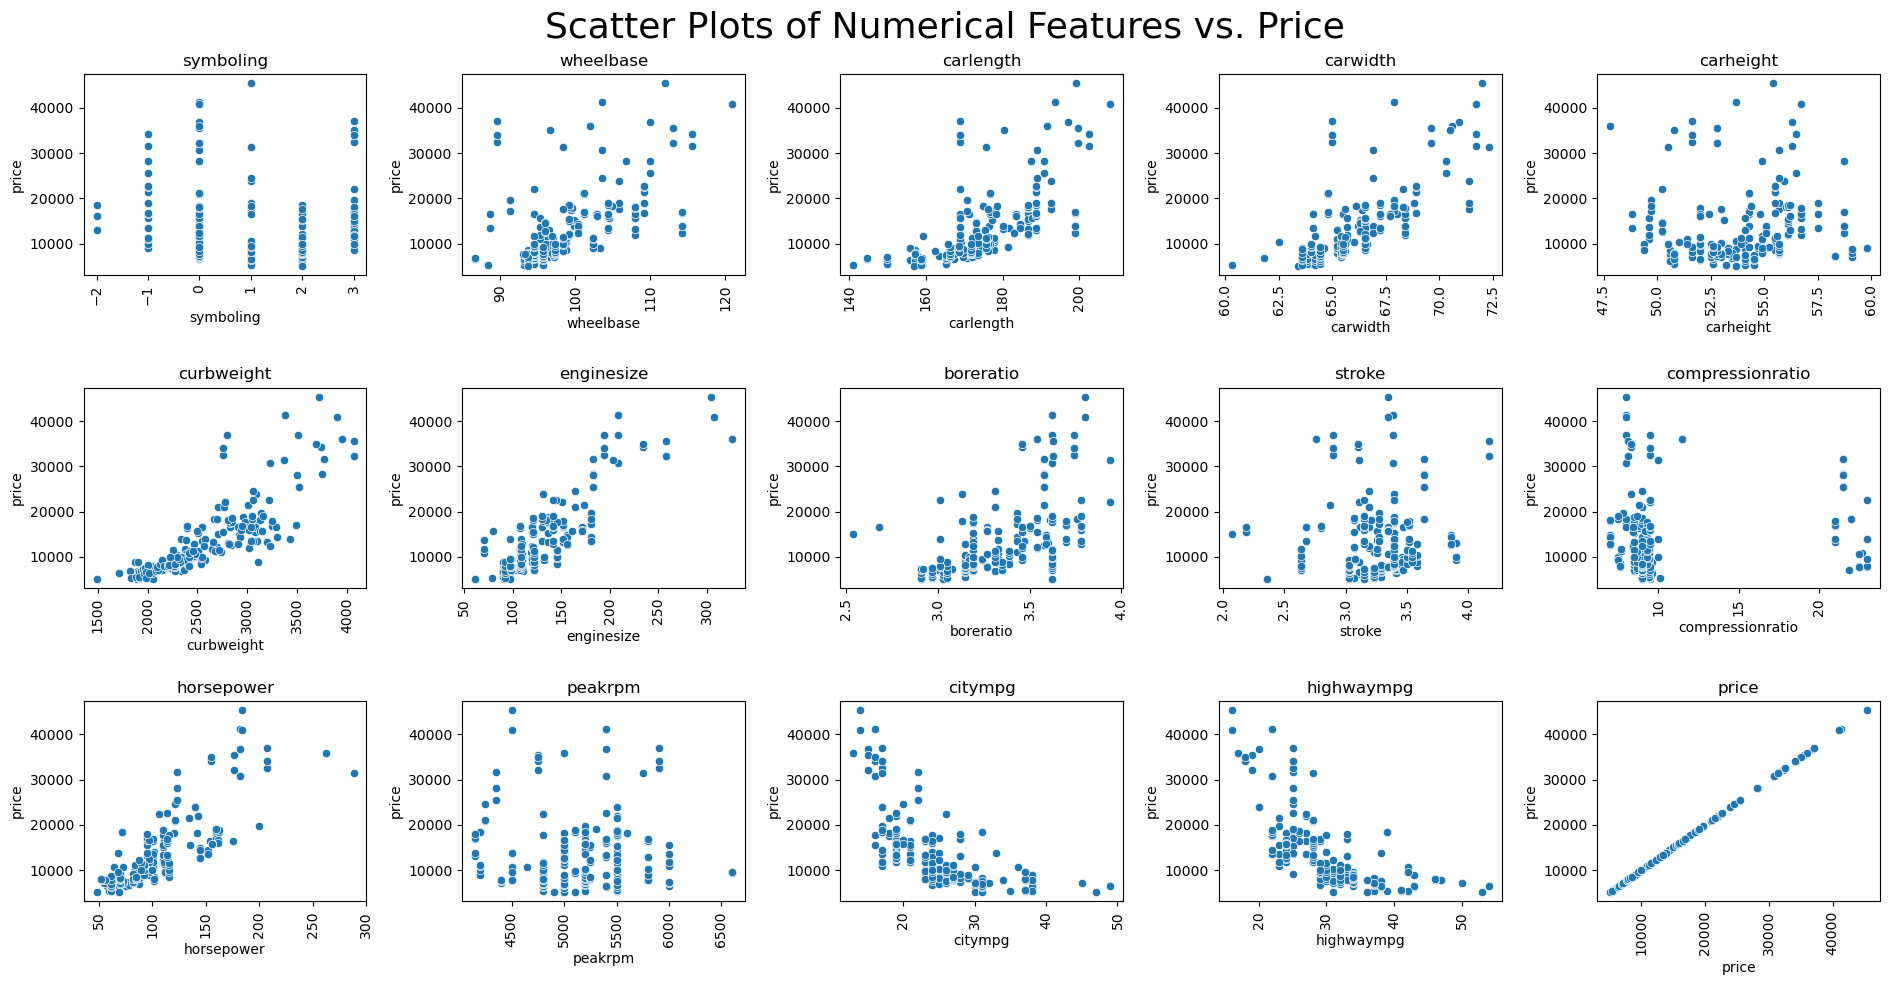

In [28]:
# Create a figure and axis objects for subplots for Numerical features
fig, axs = plt.subplots(3, 5, figsize=(19, 10), sharex=False, sharey=False)

axs = axs.flatten()

# Iterate over the features and create scatter subplots
for i, feature in enumerate(Numerical_feature):
    sns.scatterplot(data=df, x=feature, y='price', ax=axs[i])
    axs[i].set_title(feature)

    # Rotate x-axis tick labels to vertical
    axs[i].tick_params(axis='x', rotation=90)

# Add a common title for the entire figure
fig.suptitle('Scatter Plots of Numerical Features vs. Price', fontsize=26)

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout(h_pad=2)

# Display the plot
plt.show()


Now as Price is our dependent variable lets plot it with the help of some graphs

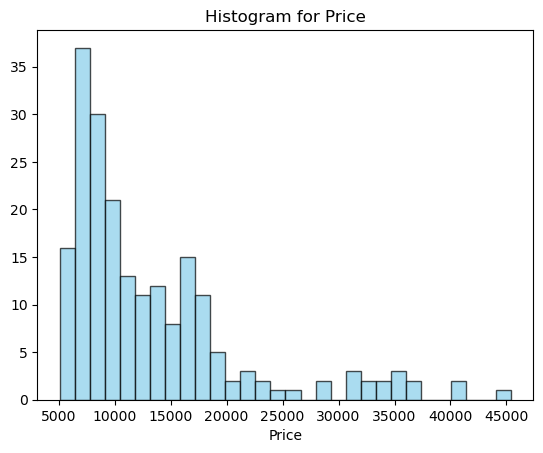

In [29]:
plt.hist(df['price'], bins=30,color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram for Price')
plt.xlabel('Price')

# Show the plot
plt.show()

<Figure size 1500x1000 with 0 Axes>

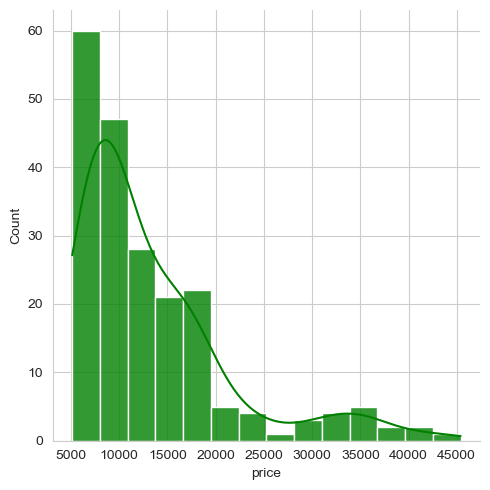

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.displot(df.price, kde=True, alpha=0.8, color="g")
plt.show()

We can see as the count is decreasing the price is increasing

In [31]:
# Now we see the correlation among all the Numerical features

data = df[Numerical_feature].corr()
data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


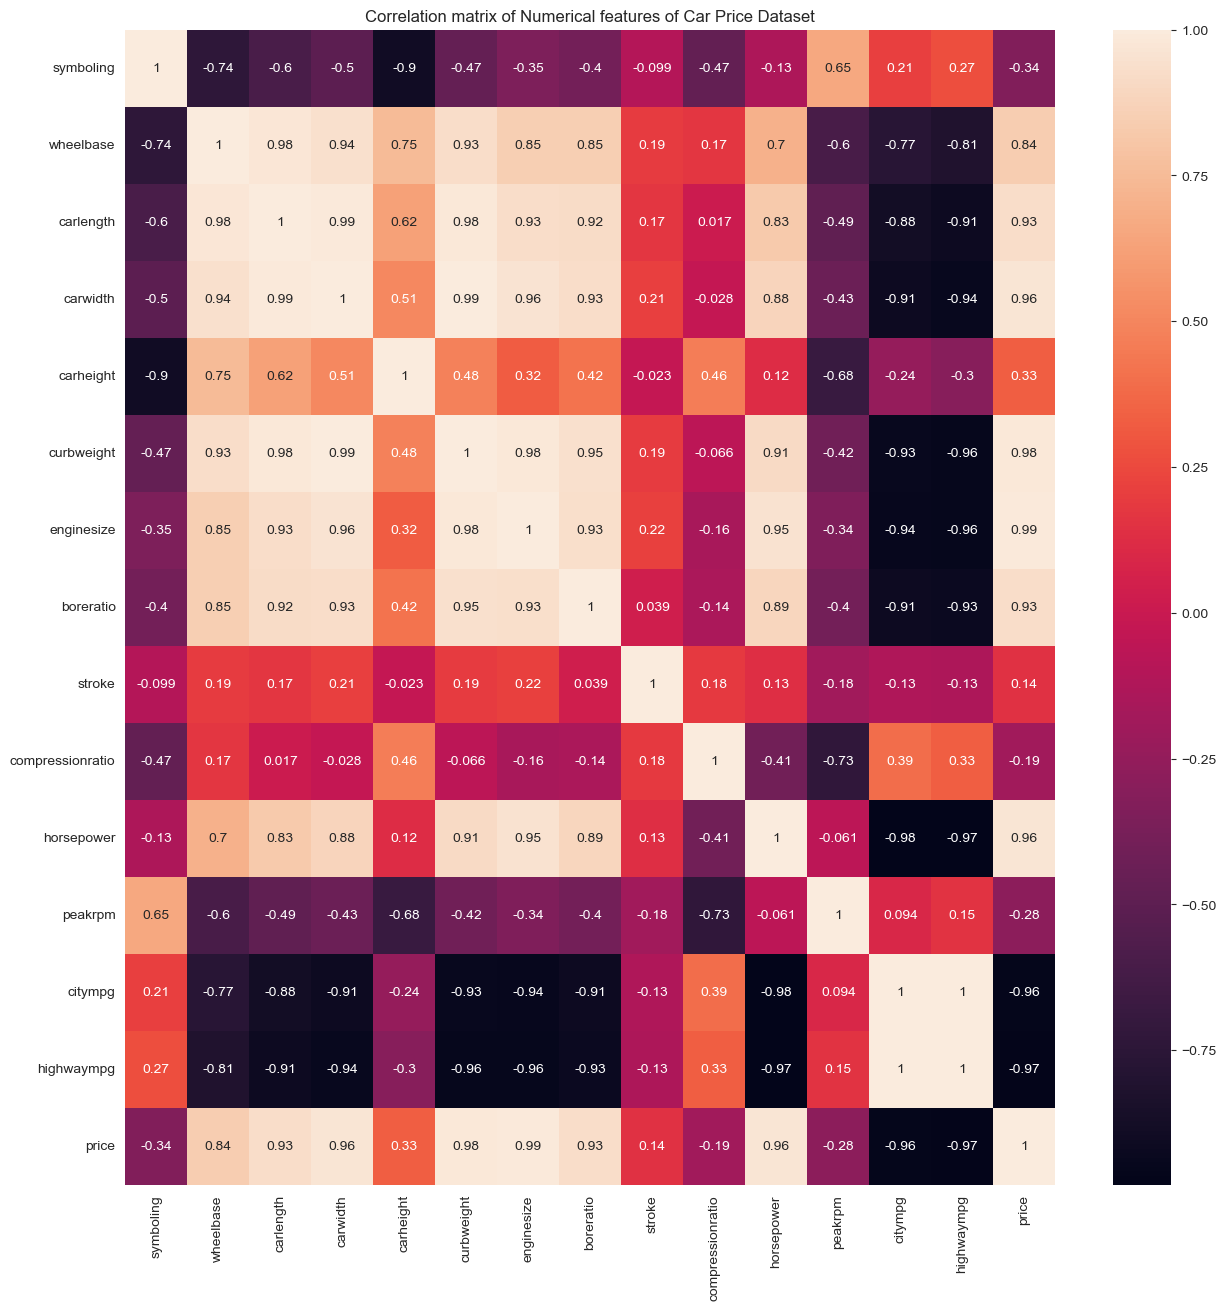

In [32]:
# lets create a heatmap of this correlation

plt.figure(figsize=(15,15))
plt.title("Correlation matrix of Numerical features of Car Price Dataset")

sns.heatmap(data.corr(), annot=True)
plt.show()

As per the above heatmap we can see dependent variable price has a high correlation with these independent variables :-
    
- Carlength
- Carwidth
- Curbweight
- Enginesize
- Boreratio
- Horsepower

As per the above heatmap we can see dependent variable price has a negative correlation with these independent variables :-
    
- Citympg
- Highwaympg

Some of the indepenent variables which have a high correlation with dependent variable 'price' have a high correlation among them also such as

- enginesize with horsepower, boreratio, carwidth, carlength and curbweight
- curbweight with boreratio, enginesize, carwidth and carlength
- This is because of the multicollinearity between the independent variabless

In [33]:
df[Numerical_feature].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [34]:
df[Categorical_feature].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


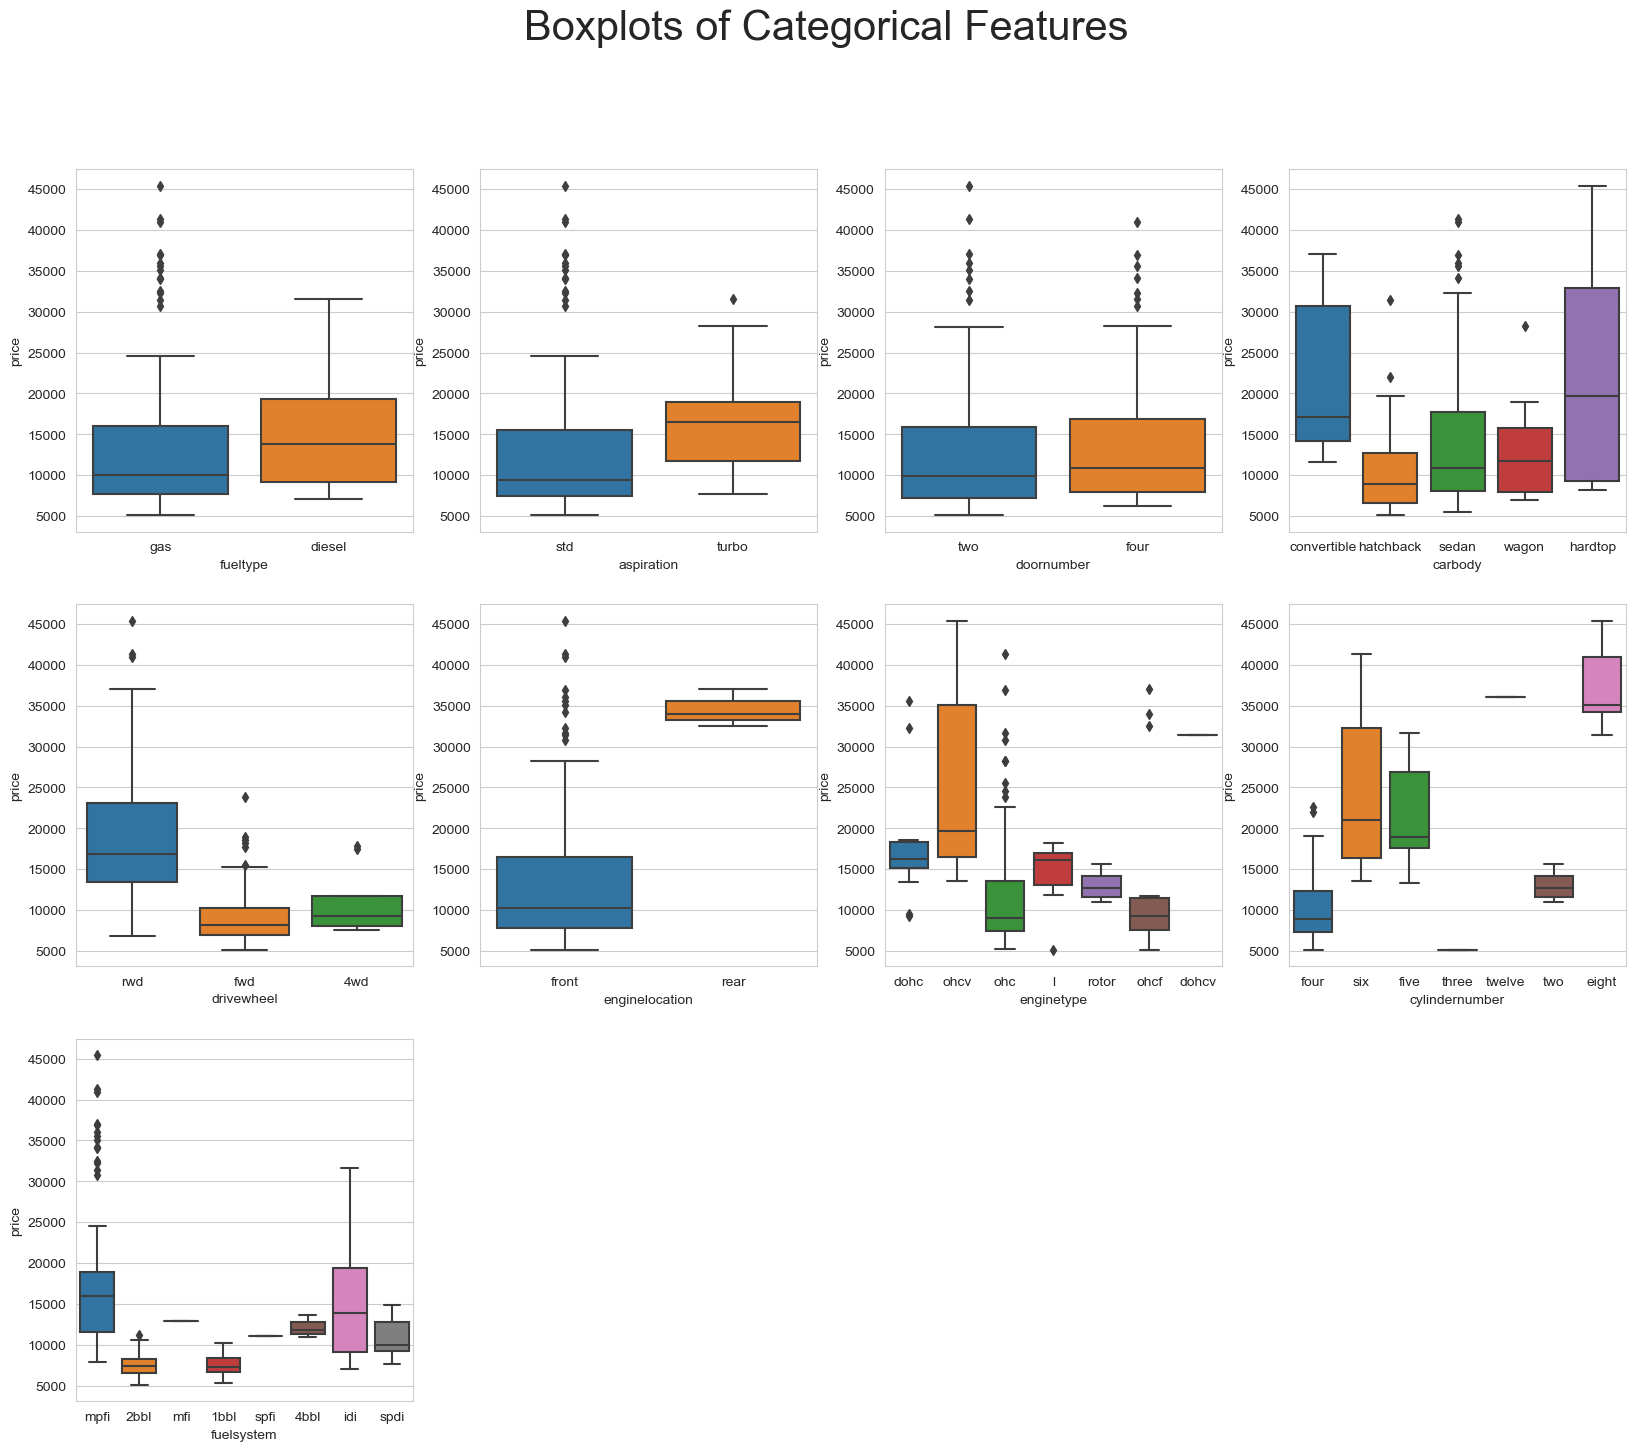

In [35]:
# Visualising Categorical variables through boxplots

plt.figure(figsize=(20, 16))
plt.subplot(3,4,1)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,4,2)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,4,3)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,4,4)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,4,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,4,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,4,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,4,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(3,4,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)

plt.suptitle("Boxplots of Categorical Features", fontsize=30)
plt.show()

As per these boxplots we can see that cars are clearly pricer with :-
    
- Carbody
- Enginelocation, Enginetype
- Cylindernumbers

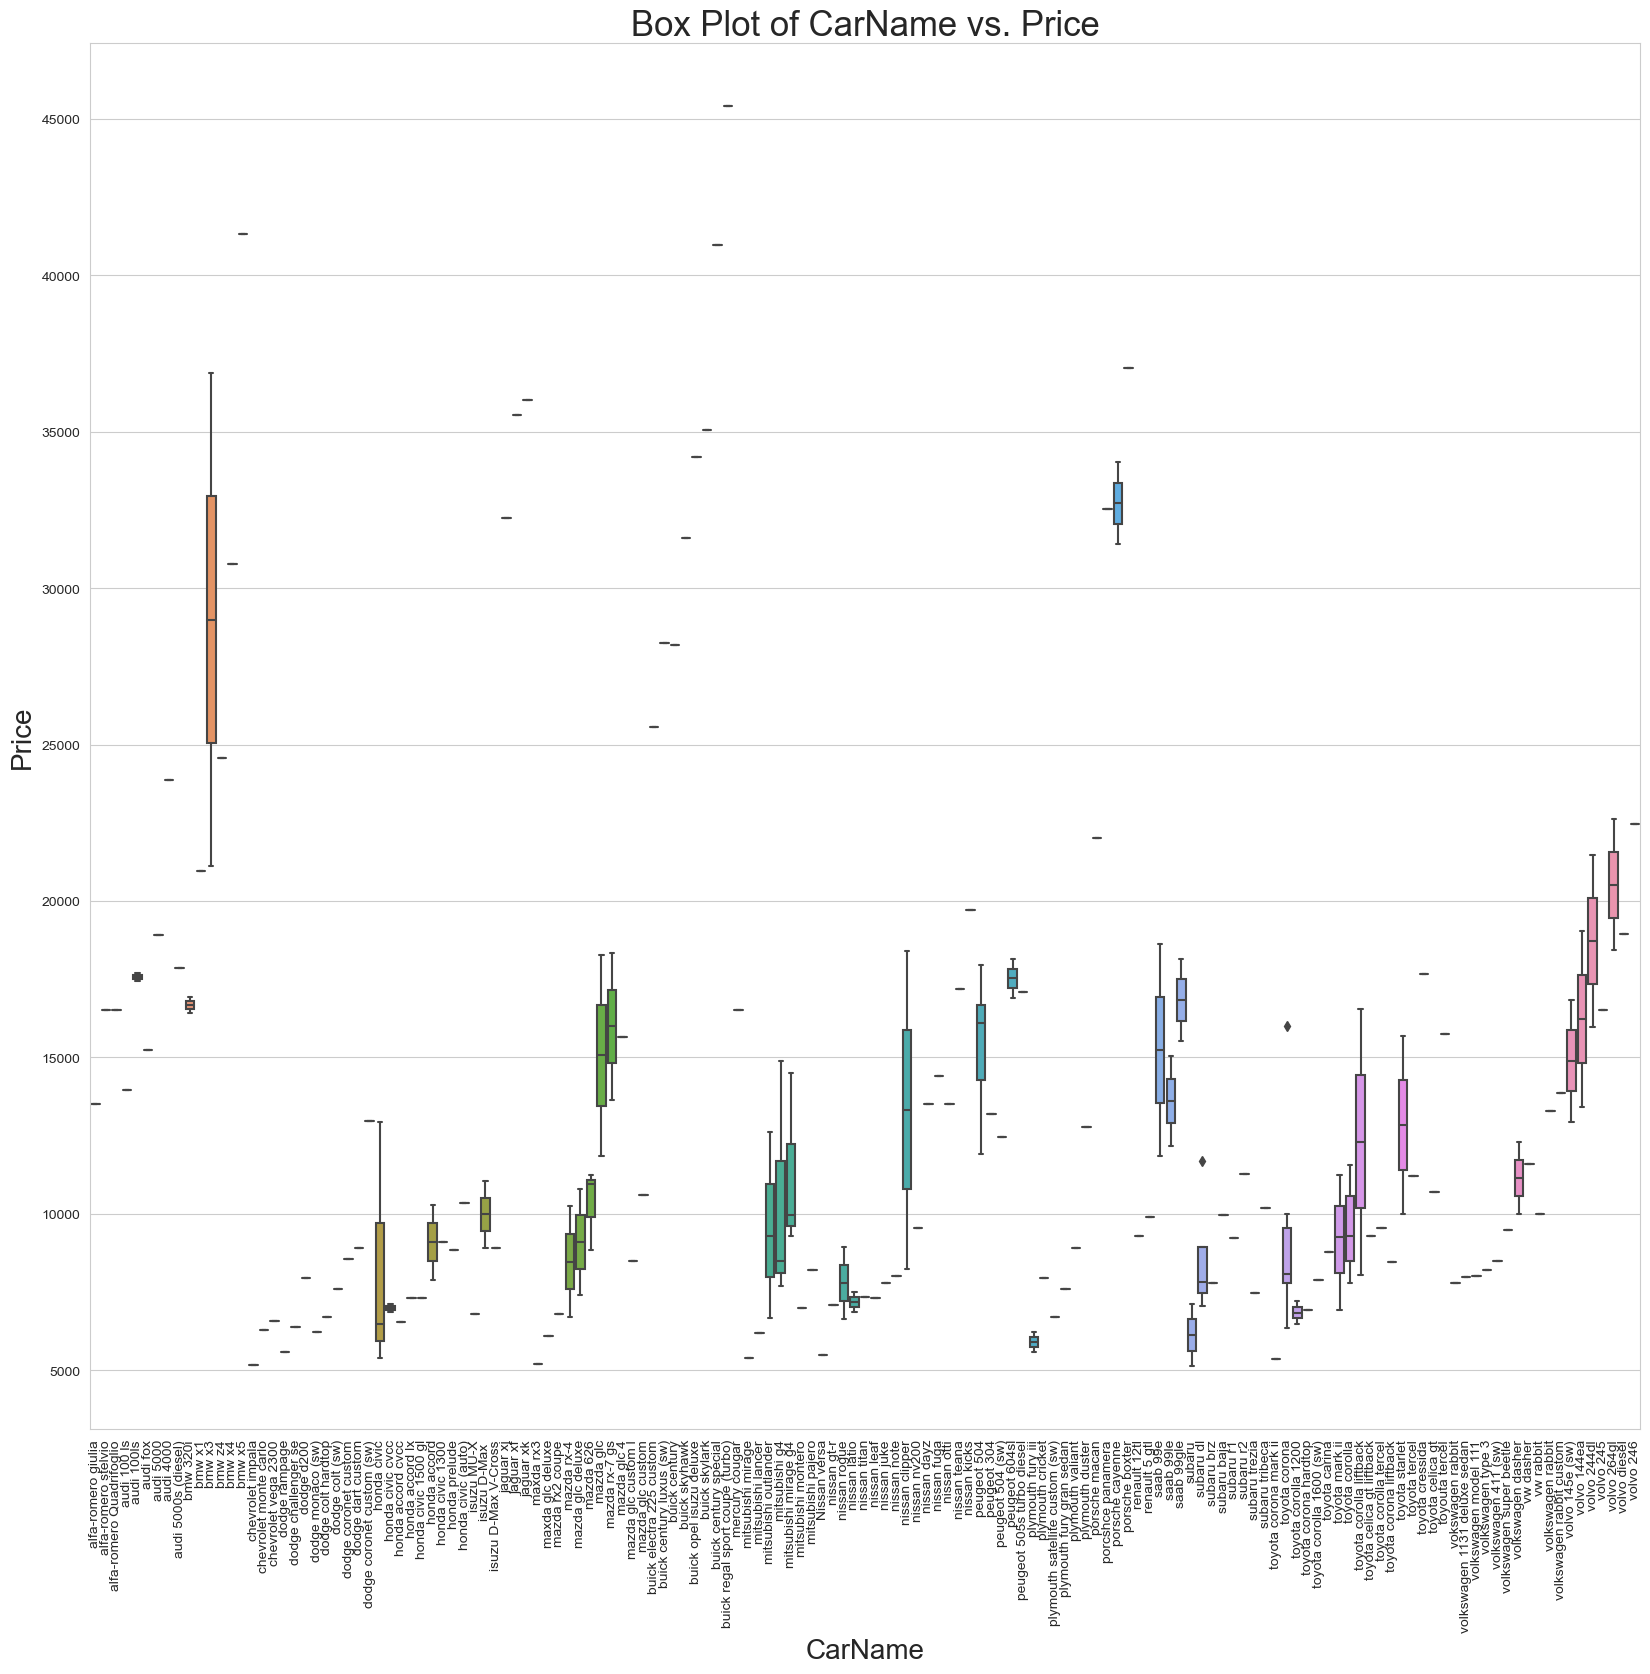

In [36]:
# Visualising 'CarName' variable aginst dependent variable 'price' via boxplot

plt.figure(figsize=(20, 18))
sns.boxplot(x = 'CarName', y = 'price', data = df)
plt.xticks(rotation=90) 
plt.title('Box Plot of CarName vs. Price', fontsize=25)
plt.xlabel('CarName', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

# Creating a model using DecisionTreeRegressor

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# Here price is our dependent variable and data1 is our independent numerical features

predict = "price"
data1 = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

In [39]:
df=df.copy()  # to make a copy of original dataset
X = df[data1].drop(predict, axis=1)  # to use our data for training we can drop dependent feature which is price

In [40]:
X

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [41]:
Y = df[predict]

In [42]:
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
model = DecisionTreeRegressor()

In [46]:
model

DecisionTreeRegressor()

In [47]:
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [48]:
y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
predictions = model.predict(X_test)
model.score(X_test, y_pred)

1.0

In [50]:
mse = mean_squared_error(Y_test, y_pred)

# Calculate the R-squared score
r2 = r2_score(Y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared score:", r2)

Mean Squared Error (MSE): 8804554.996387538
R-squared score: 0.8884709076345477


# Creating a model using Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression

In [67]:
from sklearn.model_selection import train_test_split

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

In [141]:
# First we will drop CarName feature from categorical feature dataset as it's not required

Categorical_feature_data = df[Categorical_feature].drop("CarName", axis=1)  

In [142]:
Categorical_feature_data

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [144]:
# Here we will convert our remaining dataset into dummies values but it will create into Boolean form which is True and False

data_with_dummies = pd.get_dummies(Categorical_feature_data, columns=["fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber", "fuelsystem"])

In [151]:
# So we can convert it into integers(0,1) using astype

data_with_dummies = data_with_dummies.astype(int)

In [152]:
data_with_dummies

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
201,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
202,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
203,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [159]:
# Now we need to combine our numerical features dataset with the dummy dataset which we have created

data_1 = pd.concat([df[Numerical_feature], data_with_dummies],axis=1)

In [160]:
data_1

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [161]:
# Now we will only use the columns which are required and drop the other columns using drop ()

X = data_1.drop(["price", "symboling", "stroke", "peakrpm", "citympg", "highwaympg"], axis=1)

In [162]:
# Then we will convert our entire dataset into float datatype using astype

X = X.astype(float)

In [163]:
X

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,compressionratio,horsepower,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,9.0,111.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,9.0,111.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,9.0,154.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,10.0,102.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,8.0,115.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,9.5,114.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,8.7,160.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,8.8,134.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,23.0,106.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [164]:
Y = df["price"]

In [165]:
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [166]:
# Here we will divide our dataset for training and testing 0.2 for testing mean 20% and 80% for training

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 42)

In [167]:
model = LinearRegression()

In [168]:
model

LinearRegression()

In [169]:
model.fit(X_train, Y_train)

LinearRegression()

In [170]:
y_pred = model.predict(X_test)

In [171]:
y_pred

array([2.61836373e+04, 2.03865756e+04, 1.07359998e+04, 1.20319195e+04,
       2.72286880e+04, 5.86693615e+03, 7.06740265e+03, 7.68624030e+03,
       8.43773270e+03, 8.69379875e+03, 1.70305615e+04, 8.04357730e+03,
       1.59571489e+04, 1.11552580e+04, 4.30106591e+04, 5.84420367e+03,
       3.13795111e+01, 1.41569676e+04, 1.07517283e+04, 9.80905822e+03,
       1.14170803e+04, 1.60356762e+04, 4.48326260e+03, 4.82680466e+03,
       6.87608923e+03, 2.70332899e+04, 1.26406732e+04, 1.61403720e+04,
       4.79602822e+03, 1.72809080e+04, 2.76950904e+04, 5.66445560e+03,
       6.08752360e+03, 1.69704516e+04, 6.47932711e+03, 2.48838996e+04,
       1.19266676e+04, 1.27323762e+04, 6.62084373e+03, 1.46008597e+04,
       7.00238590e+03])

In [172]:
mse = mean_squared_error(Y_test, y_pred)

In [173]:
mse

10546705.673245631

In [174]:
r2 = r2_score(Y_test, y_pred)

In [175]:
r2

0.8664027299885948

In [179]:
print("R2 score is", r2*100,"%")

R2 score is 86.64027299885947 %


# Final Conclusion

We have use to techniques to train create a model which is Decision TreeRegressor and Linear Regression and as we can see using Decision TreeRegressor model we have achieve _R-squared score: 0.8884709076345477_ and using Linear Regression _R-squared score: 0.8664027299885948_ so both the models work quite well and indicating that the model is capturing a significant portion of the underlying patterns in the data and making accurate predictions.

Overall, based on the provided accuracy scores, we can conclude that the model appears to be performing well, demonstrating good generalization to unseen data. However, it is important to consider other performance metrics and conduct further evaluation (e.g., precision, recall, F1-score) to have a comprehensive assessment of the model's performance and suitability for the specific task at hand. 